In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf

# Verify TensorFlow sees no GPUs
tf.config.set_visible_devices([], 'GPU')
print("GPUs Available:", tf.config.list_physical_devices('GPU'))  # Should print an empty list

GPUs Available: []


In [5]:
import torch
from pathlib import Path
import numpy as np
import pandas as pd
import random
from glob import glob
import sklearn

from tqdm.autonotebook import tqdm
from sklearn.metrics import average_precision_score, roc_auc_score
from pathlib import Path

#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'

# opensoundscape transfer learning tools
from opensoundscape.ml.shallow_classifier import MLPClassifier, quick_fit, fit_classifier_on_embeddings


In [6]:
train_labels = pd.read_csv('./data/train_labels_5s.csv', index_col = [0,1,2])
test_labels = pd.read_csv('./data/test_labels_5s.csv', index_col = [0,1,2])
test_labels.head()

Hypsipetes_madagascariensis  \
file                                               start_time end_time                                
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        5.0                             False   
                                                   5.0        10.0                            False   
                                                   10.0       15.0                            False   
                                                   15.0       20.0                            False   
                                                   20.0       25.0                            False   

                                                                        Copsychus_albospecularis  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        5.0                          False   
                                                   5.0        10.0                         False   
                                                   10.0       15.0                         False   
                                                   15.0       20.0                         False   
                                                   20.0       25.0                         False   

                                                                        Coracopsis_nigra  \
file                                               start_time end_time                     
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        5.0                  False   
                                                   5.0        10.0                 False   
                                                   10.0       15.0                 False   
                                                   15.0       20.0                 False   
                                                   20.0       25.0                 False   

                                                                        Dicrurus_forficatus  \
file                                               start_time end_time                        
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        5.0                     False   
                                                   5.0        10.0                    False   
                                                   10.0       15.0                    False   
                                                   15.0       20.0                    False   
                                                   20.0       25.0                    False   

                                                                        Coua_caerulea  \
file                                               start_time end_time                  
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        5.0               False   
                                                   5.0        10.0              False   
                                                   10.0       15.0              False   
                                                   15.0       20.0              False   
                                                   20.0       25.0              False   

                                                                        Zosterops_maderaspatanus  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        5.0                          False   
                                                   5.0        10.0                         False   
                                                   10.0       15.0                         False   
                                                   15.0       20.0                         False   
                                                   20.0       25.0                         False   

             

In [7]:
# pick classes to train the model on. These should occur in the annotated data
class_list = ['Hypsipetes_madagascariensis','Copsychus_albospecularis','Coracopsis_nigra','Dicrurus_forficatus','Coua_caerulea','Zosterops_maderaspatanus','Eurystomus_glaucurus','Agapornis_canus','Saxicola_torquatus','Cyanolanius_madagascarinus','Leptopterus_chabert','Nesoenas_picturatus','Coua_reynaudii','Ceblepyris_cinereus','Neodrepanis_coruscans','Philepitta_castanea','Eulemur_sp','Coua_cristata','Treron_australis']


In [8]:
from bioacoustics_model_zoo import Perch

In [9]:
#specify the name of the file you want to load
filename = 'Shallow_classifier_perch_resample'

In [10]:
perch_model = Perch.load(f'./Perch/{filename}.model')

/home/sholmes3/Linux/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/bioacoustics_model_zoo/tensorflow_wrapper.py:224: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f

AttributeError: cannot import name 'float4_e2m1fn' from 'ml_dtypes'

At:
  /home/sholmes3/Linux/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/ml_dtypes/__init__.py(71): __getattr__
  /home/sholmes3/Linux/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/tensorflow/python/training/py_checkpoint_reader.py(66): get_tensor
  /home/sholmes3/Linux/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/tensorflow/python/checkpoint/checkpoint.py(1463): restore
  /home/sholmes3/Linux/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py(561): _restore_checkpoint
  /home/sholmes3/Linux/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py(226): __init__
  /home/sholmes3/Linux/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py(1042): load_partial
  /home/sholmes3/Linux/miniconda3/envs/rewilding_tenso

/home/sholmes3/Linux/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/opensoundscape/ml/cnn.py:621: UserWarning: 
                    This architecture is not listed in opensoundscape.ml.cnn_architectures.ARCH_DICT.
                    It will not be available for loading after saving the model with .save() (unless using pickle=True). 
                    To make it re-loadable, define a function that generates the architecture from arguments: (n_classes, n_channels) 
                    then use opensoundscape.ml.cnn_architectures.register_architecture() to register the generating function.

                    The function can also set the returned object's .constructor_name to the registered string key in ARCH_DICT
                    to avoid this warning and ensure it is reloaded correctly by opensoundscape.ml.load_model().

                    See opensoundscape.ml.cnn_architectures module for examples of constructor functions
                    
  warnings.warn

In [7]:
perch_model.use_custom_classifier

True

In [8]:
# make predictions by passing the embeddings through the classifier
preds = perch_model.predict(test_labels,batch_size=64)

preds

/home/sholmes3/Linux/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/opensoundscape/ml/datasets.py:87: UserWarning: Index of dataframe passed to preprocessor must be a file path. First sample ('/mnt/class_data/group1_bioacoustics/sheila/cv4e_dataset/test/Marojejy/ANT_A/ANT_A-ANT02/ANT_A-ANT02_20230407_140000.WAV', 0.0, 5.0) was not found.
  warnings.warn(


  0%|          | 0/24 [00:00<?, ?it/s]

/home/sholmes3/Linux/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/opensoundscape/audio.py:1446: UserWarning: Failed to load metadata: argument of type 'NoneType' is not iterable. Metadata will be None
  warnings.warn(f"Failed to load metadata: {exc}. Metadata will be None")


IndexError: None of the samples in the SafeDataset loaded. All samples caused exceptions during preprocessing. The mostrecent exception is in the error trace. 

/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):
/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7065: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7066: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/sklearn/metrics/_ranking.py

array([0.94224267, 0.98920149, 0.99385524, 0.99756643, 0.97699563,
       0.99389291, 0.98889234, 0.98785812, 0.99614726, 0.98488451,
       0.99242941,        nan,        nan, 0.6743555 , 0.99751075,
       0.23548606, 0.89263302,        nan, 0.75186441])

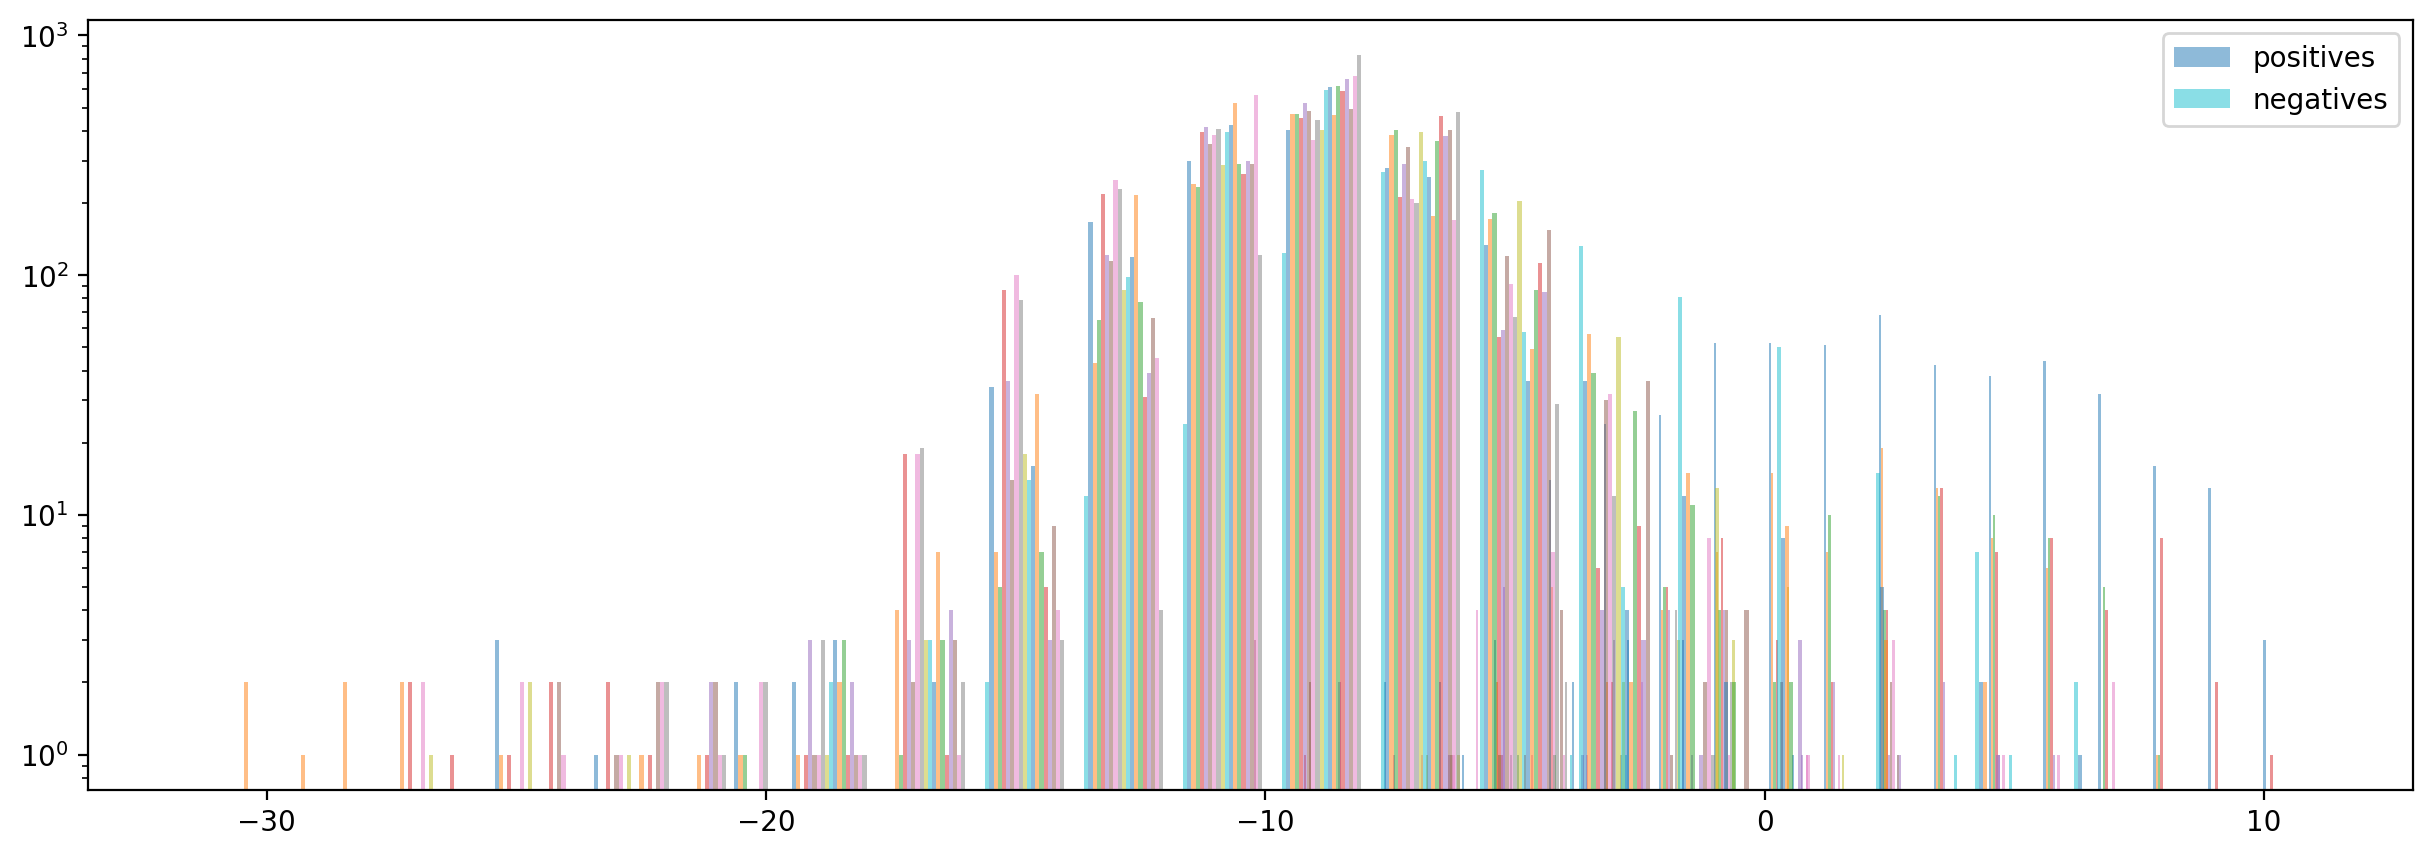

In [ ]:

# plot histogram of scores for positive and negative clips
plt.hist(preds[test_labels==True],bins=20,alpha=0.5,label='positives')
plt.hist(preds[test_labels==False],bins=20,alpha=0.5,label='negatives')
plt.legend()
plt.semilogy()

# calculate the area under the ROC score
roc_auc_score(test_labels.values,preds,average=None)

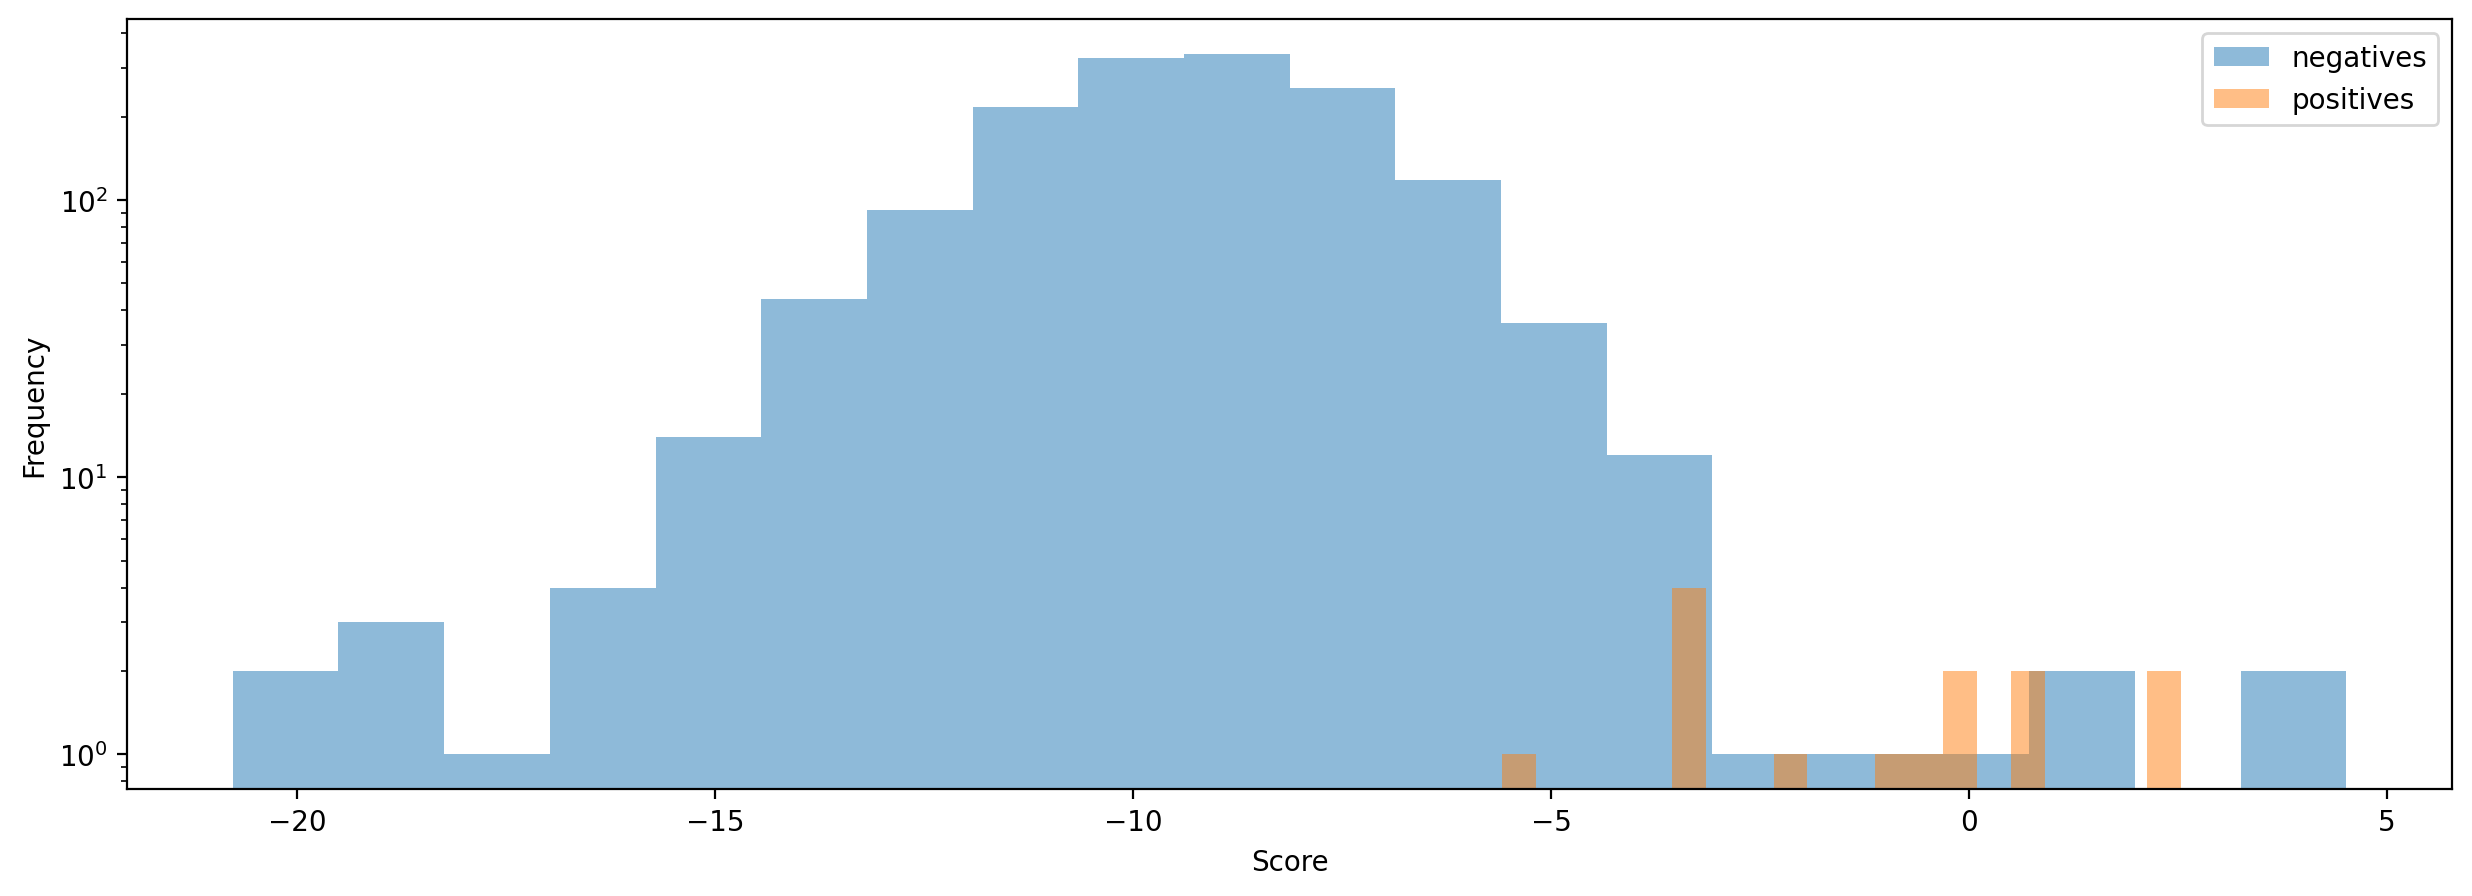

In [ ]:
histspecies = 'Zosterops_maderaspatanus'
# Filter
df_Pos = preds[test_labels==True]
df_NOT = preds[test_labels==False]
# Plot histograms
plt.hist(df_NOT[histspecies],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspecies],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

In [ ]:
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
#write a loop to cycle through the class list and save histograms for each species for the model read in at the top of this notebook
path = './histograms'
for species in class_list:
    speciespred = species + 'pred'
    scores_valid_df = test_labels.join(preds, rsuffix="pred")
    # Filter
    df_Pos = scores_valid_df[scores_valid_df[species] == True] #or whatever your class of interest is called
    df_NOT = scores_valid_df[scores_valid_df[species] == False]
    # Plot histograms
    plt.hist(df_NOT[speciespred],bins=20,alpha=0.5,label='negatives')
    plt.hist(df_Pos[speciespred],bins=20,alpha=0.5,label='positives')
    # Add a legend and labels
    plt.legend()
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    # Show the plot
    plt.savefig(f'./histograms/{filename}_{species}.png')
    plt.clf()

<Figure size 1500x500 with 0 Axes>

In [ ]:
#set up plotting on log scale on y axis - easier to see small sample sizes
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
#write a loop to cycle through the class list and save histograms for each species for the model read in at the top of this notebook
path = './histograms'
for species in class_list:
    speciespred = species + 'pred'
    scores_valid_df = test_labels.join(preds, rsuffix="pred")
    # Filter
    df_Pos = scores_valid_df[scores_valid_df[species] == True] #or whatever your class of interest is called
    df_NOT = scores_valid_df[scores_valid_df[species] == False]
    # Plot histograms
    plt.hist(df_NOT[speciespred],bins=20,alpha=0.5,label='negatives')
    plt.hist(df_Pos[speciespred],bins=20,alpha=0.5,label='positives')
    # Add a legend and labels
    plt.legend()
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.semilogy()
    # Save the plot
    plt.savefig(f'./histograms/semilog/{filename}_{species}.png')
    plt.clf()

<Figure size 1500x500 with 0 Axes>

In [ ]:
avprecscore_auroc_by_sp = pd.DataFrame(columns=['species', 'avg_precision_score','auroc_score'])
for species in class_list:
    avgscore = sklearn.metrics.average_precision_score(test_labels [species],preds [species])
    auroc = sklearn.metrics.roc_auc_score(test_labels[species],preds [species])
    new_row = pd.DataFrame({'species': [species], 'avg_precision_score': [avgscore], 'auroc_score': [auroc]})
    avprecscore_auroc_by_sp = pd.concat([avprecscore_auroc_by_sp, new_row], ignore_index=True)

avprecscore_auroc_by_sp

/tmp/ipykernel_473786/3174497413.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  avprecscore_auroc_by_sp = pd.concat([avprecscore_auroc_by_sp, new_row], ignore_index=True)
/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1033: UserWarni

,species,avg_precision_score,auroc_score
0,Hypsipetes_madagascariensis,0.886168,0.942243
1,Copsychus_albospecularis,0.806918,0.989201
2,Coracopsis_nigra,0.885007,0.993855
3,Dicrurus_forficatus,0.965770,0.997566
4,Coua_caerulea,0.766013,0.976996
5,Zosterops_maderaspatanus,0.511609,0.993893
6,Eurystomus_glaucurus,0.848887,0.988892
7,Agapornis_canus,0.289698,0.987858
8,Saxicola_torquatus,0.898289,0.996147
9,Cyanolanius_madagascarinus,0.536475,0.984885


In [ ]:
avprecscore_auroc_by_sp.to_csv(f'./results/{filename}.csv')